# Omicron Sentiment Analysis
The dataset was gotten from [kaggle](https://www.kaggle.com/gpreda/omicron-rising)

In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("dataset/omicron.csv")
data.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1465693385088323591,Abaris,Hants,"Would appear on Blogger (did originally), but...",2009-09-16 14:30:32,2880,4369,26907,False,2021-11-30 14:45:08,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...",['OMICRON'],Twitter Web App,0,0,False
1,1465693062999412746,GFTs ,Lalaland,There's a field somewhere beyond all doubt and...,2019-12-28 14:29:13,165,583,21152,False,2021-11-30 14:43:52,Someone told me this in October #Omicron https...,['Omicron'],Twitter for Android,0,0,False
2,1465690116442279942,Herbie Finkle (Cozy),NaN,help me find me frens ❤️,2021-07-10 09:40:57,114,393,2339,False,2021-11-30 14:32:09,Glad to see the public schoolkids are wrapping...,['COVID'],Twitter Web App,0,1,False
3,1465689607165591552,Electrical Review,United Kingdom,Electrical Review is a monthly journal aimed a...,2009-05-21 08:32:19,20759,2321,739,False,2021-11-30 14:30:08,#Automation systems have become increasingly c...,['Automation'],Hootsuite Inc.,0,0,False
4,1465688203709464578,BingX Academy 🔑,NaN,BingX (Prev. Bingbon) is the world's top crypt...,2013-12-31 02:57:32,17134,8,31,False,2021-11-30 14:24:33,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...",NaN,Twitter Web App,2,2,False


In [3]:
data.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.716800e+04,2.716800e+04,27168.000000,2.716800e+04,27168.000000,27168.000000
mean,1.467212e+18,2.296208e+05,1530.045936,1.616659e+04,1.688862,6.002282
std,1.178676e+15,1.347657e+06,7506.792154,5.245218e+04,12.097104,45.855825
min,1.465648e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.466364e+18,1.040000e+02,84.000000,2.590000e+02,0.000000,0.000000
50%,1.466981e+18,7.910000e+02,372.000000,1.658500e+03,0.000000,1.000000
75%,1.468153e+18,5.664250e+03,1299.000000,1.087525e+04,1.000000,2.000000
max,1.469598e+18,1.643610e+07,384929.000000,1.376481e+06,877.000000,2376.000000


In [4]:
#check the sum of empty rows in every column
data.isnull().sum()

id                     0
user_name              0
user_location       6452
user_description    1754
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            6787
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [5]:
#remove rows with null values
data = data.dropna()

In [6]:
#check if there are still null values
data.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

The text column in the dataset contains the tweets done by people to share their opinions about the Omicron variant. To move further, we need to clean and prepare this column for the task of sentiment analysis.

In [7]:
import nltk #Natural Language Toolkit
import re #Regular expressions
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))




def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

#apply the function clean to the text column of the data
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adunifekizitookoye/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


References
[Regular Expression](https://docs.python.org/3/library/re.html)

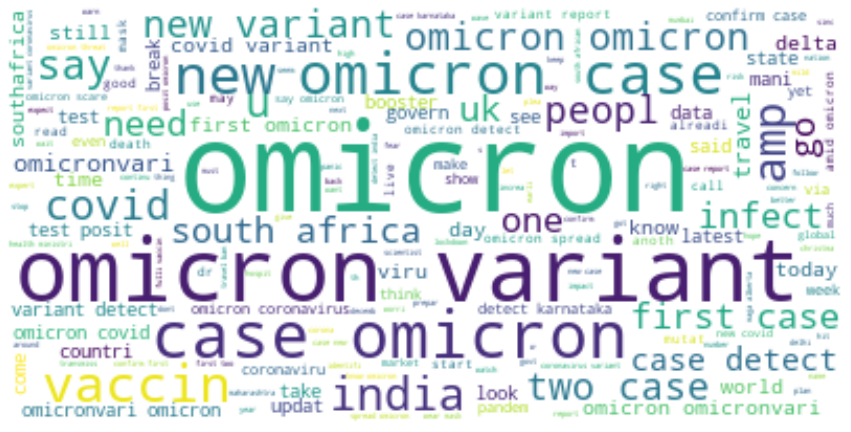

In [8]:
# create a word cloud of the text column to look at the most number of words used by the people on their tweets:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

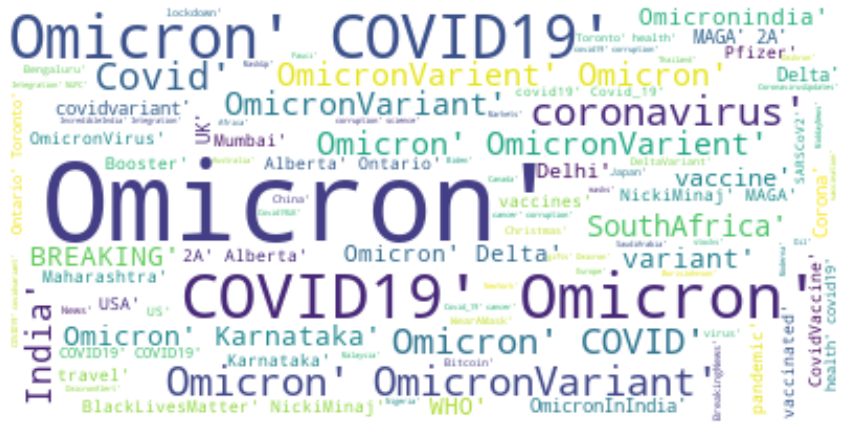

In [9]:
# create a word cloud of the hashtags to look at the most number of words used by the people on the tweets
text = " ".join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Calculate the sentiment scores of the tweets about Omicron variant. Hence three more columns would be added in this dataset as Positve, Negative, Neutral by calculating sentiment scores of the text column.

In [10]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adunifekizitookoye/nltk_data...


In [11]:
data   = data[["text", "Positive", "Negative", "Neutral"]]
data.head()

,text,Positive,Negative,Neutral
0,skynew told id back omicron “odium medicum ins...,0.16,0.000,0.840
1,someon told octob omicron,0.00,0.000,1.000
3,autom system becom increas complex effort test...,0.00,0.000,1.000
5,digitaldisrupt emerg technolog stay privat inv...,0.00,0.000,1.000
7,fatigu head bodi ach occasion sore throat coug...,0.00,0.172,0.828


**Popular Opinion on the Omicron variant**
* Find the sum of individual sentiment columns
* Compare those summations by using conditionals

In [12]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a<c):
        print("Positive 😊")
    elif (b>a) and (b>c):
        print("Negative 😠")
    else:
        print("Neutral 🙂")
        
sentiment_score(x, y, z)

Positive 😊


Therefore as of the time this project was completed most of the opinions were Positive ```Positive 😊```. Most likely sharing Positive infomation and kind sentiments to those inflicted. 